<a href="https://colab.research.google.com/github/Rohan171819/Deep_Learning./blob/main/Dropout_MNIST__Using_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.ndim

3

In [5]:
X_train.shape

(60000, 28, 28)

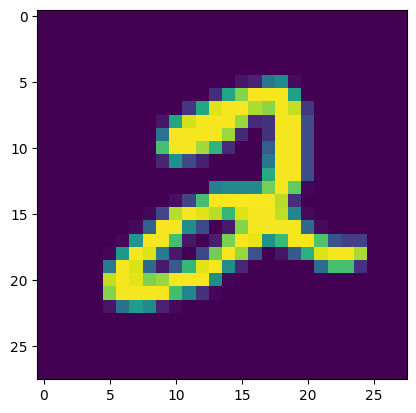

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5])

In [8]:
# Scaling the values.
X_train=X_train/255
X_test=X_test/255

In [9]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model=Sequential()

# Without Dropout Layers

In [11]:
# Flattning the Pixels values.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Compiling my Model.
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [17]:
#Training thr Model.
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0045 - accuracy: 0.9993 - val_loss: 0.6797 - val_accuracy: 0.9789
Epoch 2/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0030 - accuracy: 0.9996 - val_loss: 0.7444 - val_accuracy: 0.9786
Epoch 3/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0084 - accuracy: 0.9991 - val_loss: 0.7451 - val_accuracy: 0.9783
Epoch 4/100
1500/1500 [==============================] - 5s 3ms/step - loss: 9.5133e-04 - accuracy: 0.9998 - val_loss: 0.7431 - val_accuracy: 0.9780
Epoch 5/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.6879 - val_accuracy: 0.9784
Epoch 6/100
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0051 - accuracy: 0.9995 - val_loss: 0.6854 - val_accuracy: 0.9803
Epoch 7/100
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 0.7690 - va

In [18]:
Y_Probability=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
Y_Predicted=Y_Probability.argmax(axis=1)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_Predicted)

0.9796

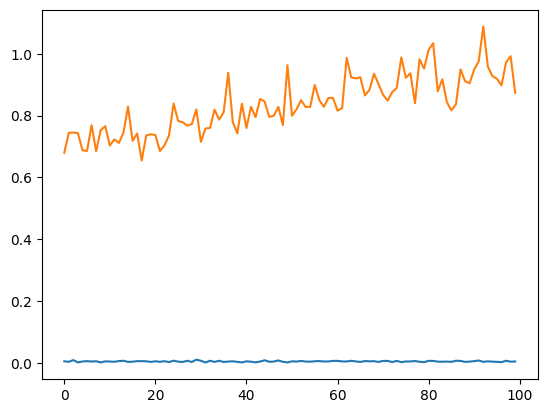

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

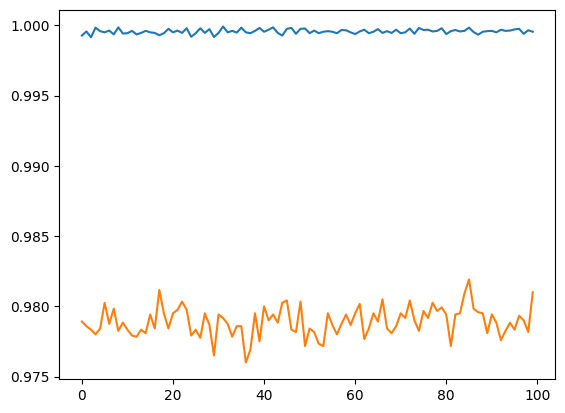

In [22]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

# With Dropout Layers

In [23]:
# Flattning the Pixels values.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
 flatten_1 (Flatten)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0

In [25]:
#Compiling my Model.
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [32]:
#Training the Model.
history=model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0146 - accuracy: 0.9988 - val_loss: 0.2920 - val_accuracy: 0.9791
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0336 - accuracy: 0.9967 - val_loss: 0.2565 - val_accuracy: 0.9753
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0282 - accuracy: 0.9970 - val_loss: 0.2843 - val_accuracy: 0.9726
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0252 - accuracy: 0.9975 - val_loss: 0.2825 - val_accuracy: 0.9773
Epoch 5/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9981 - val_loss: 0.2839 - val_accuracy: 0.9777
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0229 - accuracy: 0.9979 - val_loss: 0.2921 - val_accuracy: 0.9757
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0280 - accuracy: 0.9975 - val_loss: 0.2680 - val_accuracy:

In [33]:
Y_Probability=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [34]:
Y_Predicted=Y_Probability.argmax(axis=1)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_Predicted)

0.9783

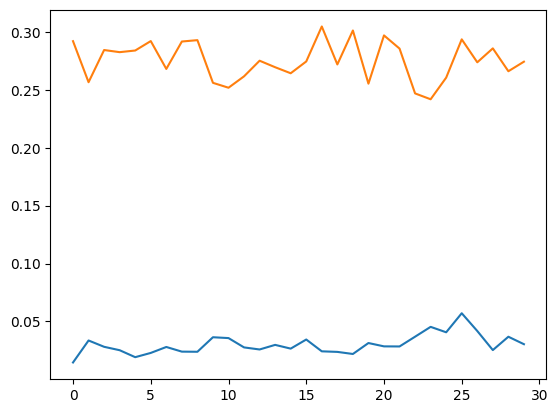

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

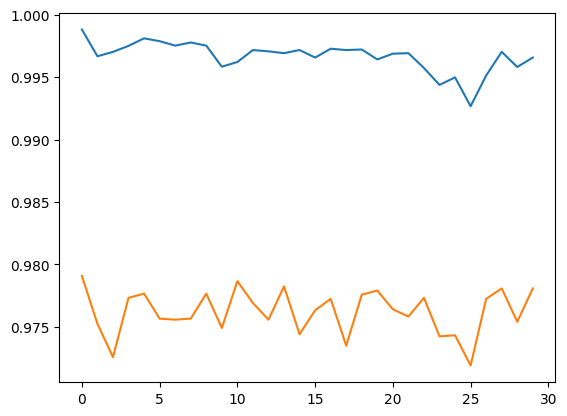

In [37]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])